<a href="https://colab.research.google.com/github/hananeY-inventor/test-regression/blob/main/regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [41]:
df = pd.read_csv('/content/sample_data/output (2).csv')

In [17]:
X=df.drop(['moody_scores.csv','Country','Year'],axis=1)
y=df['moody_scores.csv']

# **Visualize Skewness**

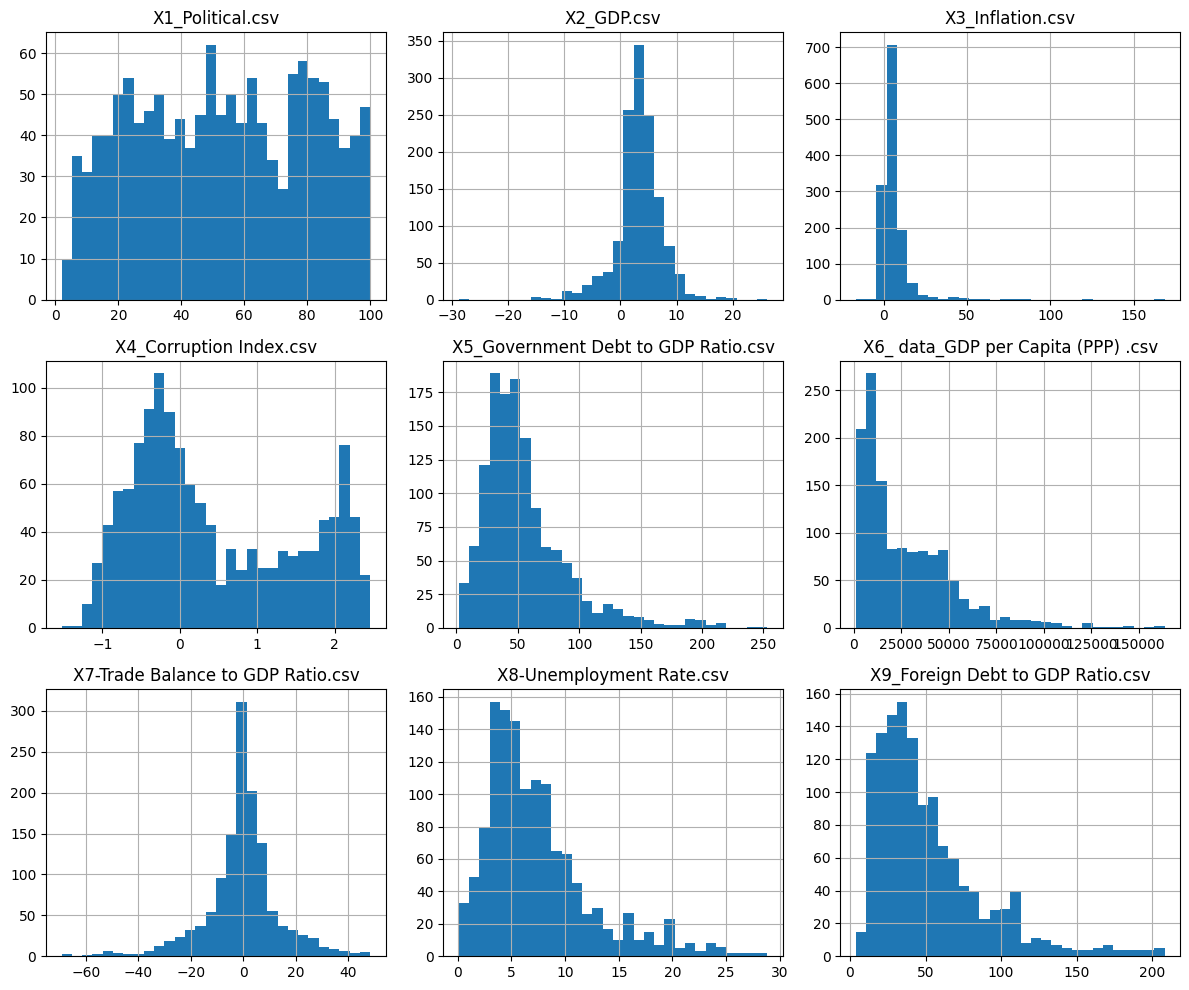

In [43]:
X.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

In [45]:
skewness = X.skew()
print("Skewness of features:\n", skewness)

Skewness of features:
 X1_Political.csv                      -0.019085
X2_GDP.csv                            -0.714635
X3_Inflation.csv                       7.316092
X4_Corruption Index.csv                0.450821
X5_Government Debt to GDP Ratio.csv    1.804550
X6_ data_GDP per Capita (PPP) .csv     1.707025
X7-Trade Balance to GDP Ratio.csv     -0.528948
X8-Unemployment Rate.csv               1.440235
X9_Foreign Debt to GDP Ratio.csv       1.637251
dtype: float64


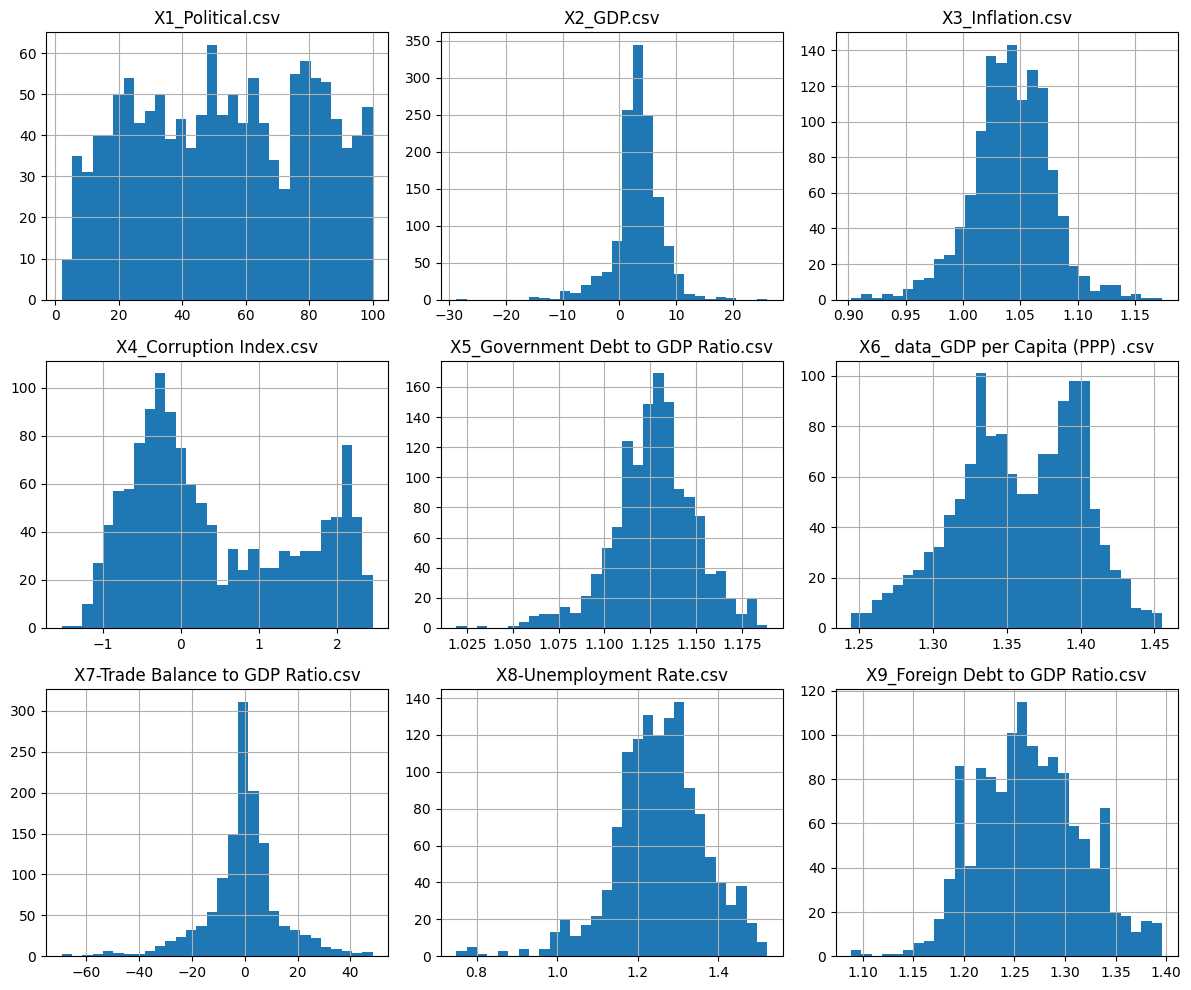

In [72]:
X.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

## ***Box-Cox Transformation:***  generalized transformation for both positive and negative skewness.



In [54]:
X['X3_Inflation.csv'] = np.sqrt(X['X3_Inflation.csv'])
X['X6_ data_GDP per Capita (PPP) .csv'] = np.sqrt(X['X6_ data_GDP per Capita (PPP) .csv'])
X['X5_Government Debt to GDP Ratio.csv'] = np.sqrt(X['X5_Government Debt to GDP Ratio.csv'])
X['X9_Foreign Debt to GDP Ratio.csv'] = np.sqrt(X['X9_Foreign Debt to GDP Ratio.csv'])
X['X8-Unemployment Rate.csv'] = np.sqrt(X['X8-Unemployment Rate.csv'])
skewness_after = X.skew()

print("Skewness after transformation:\n", skewness_after)


Skewness after transformation:
 X1_Political.csv                      -0.019085
X2_GDP.csv                            -0.714635
X3_Inflation.csv                      -0.185417
X4_Corruption Index.csv                0.450821
X5_Government Debt to GDP Ratio.csv   -0.385010
X6_ data_GDP per Capita (PPP) .csv    -0.273121
X7-Trade Balance to GDP Ratio.csv     -0.528948
X8-Unemployment Rate.csv              -0.627303
X9_Foreign Debt to GDP Ratio.csv       0.116761
dtype: float64


## **Check assumptions:** Linearity ,Independence,Homoscedasticity, Normality of Residuals

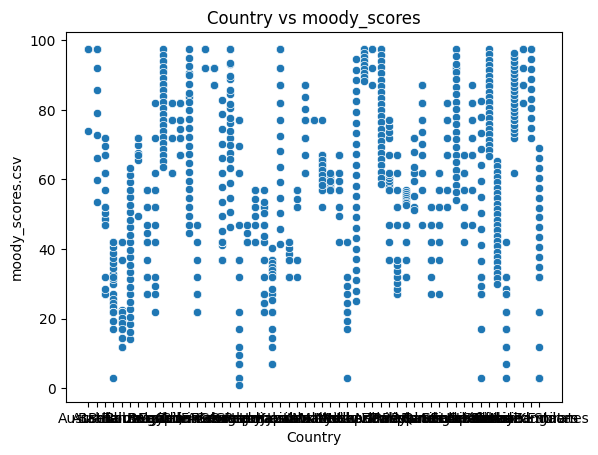

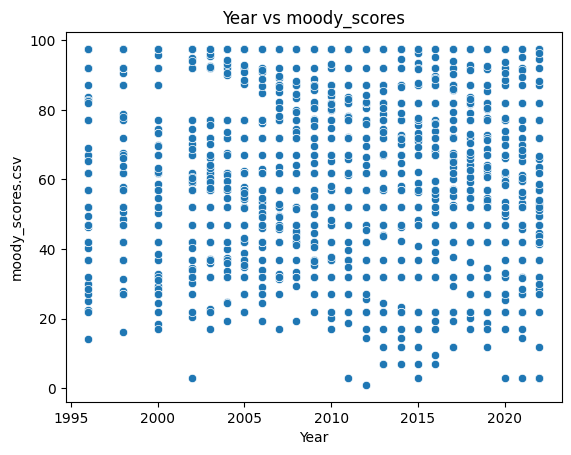

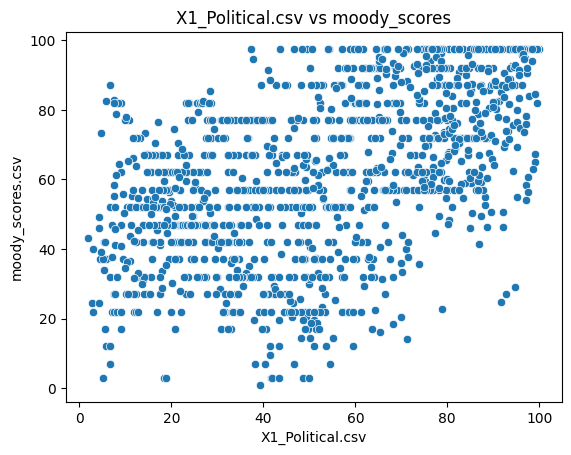

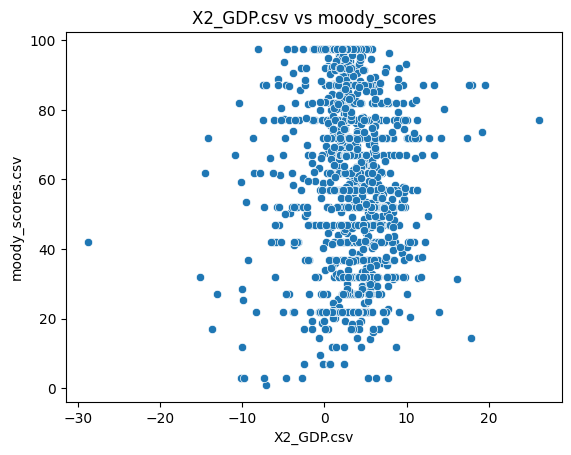

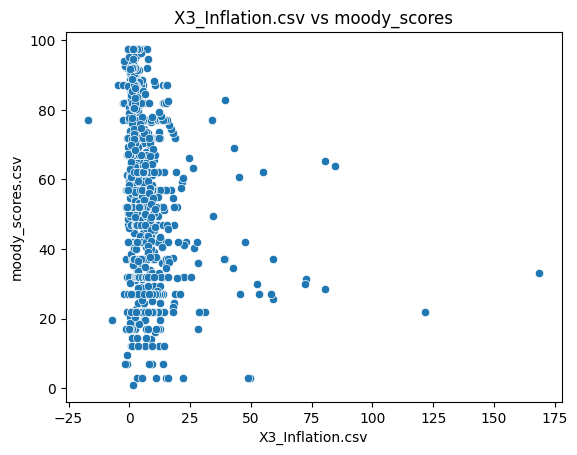

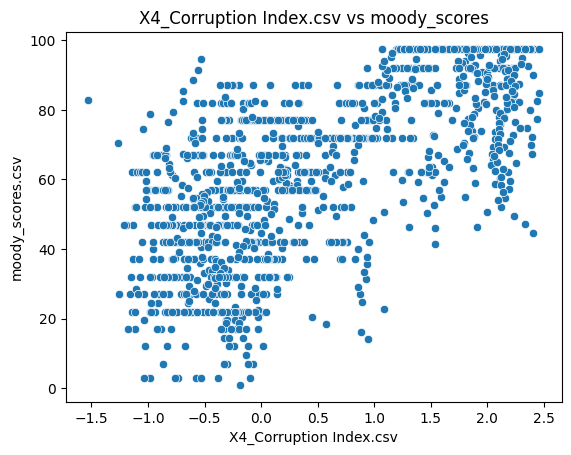

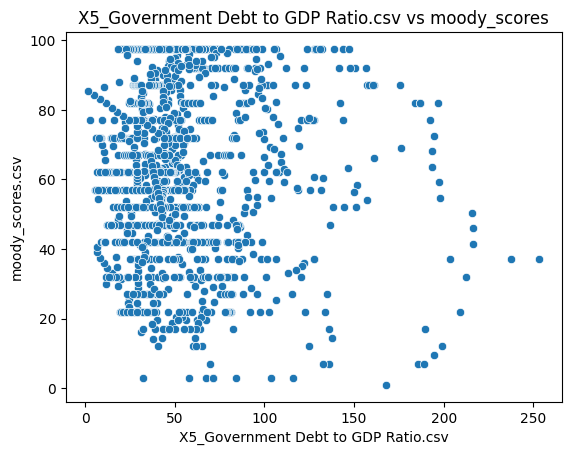

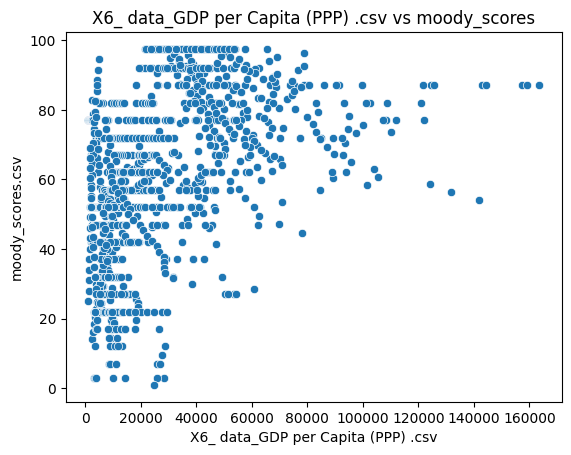

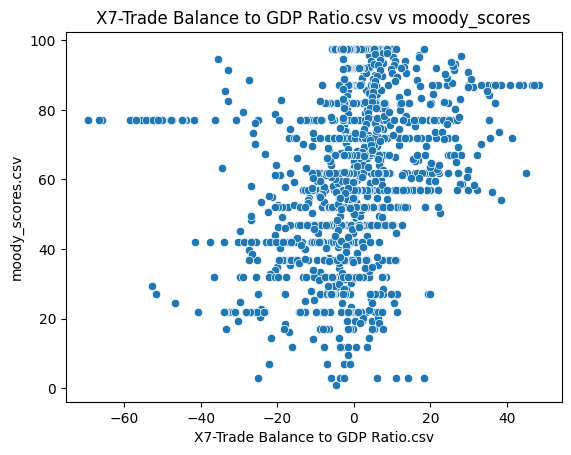

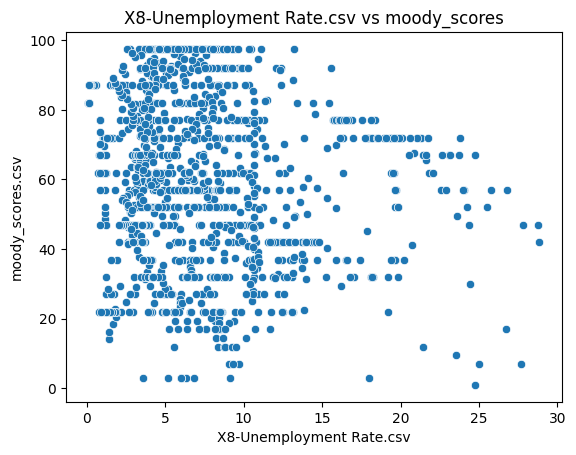

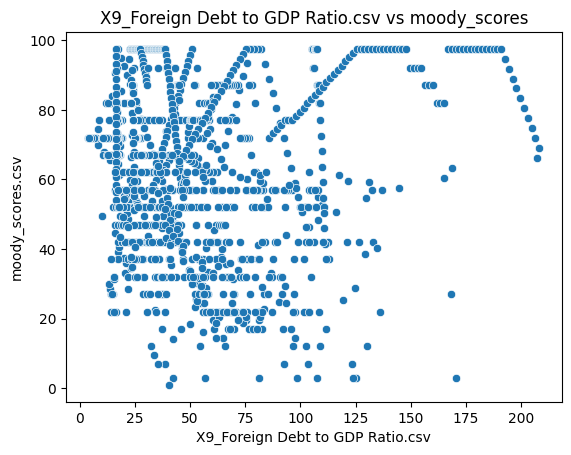

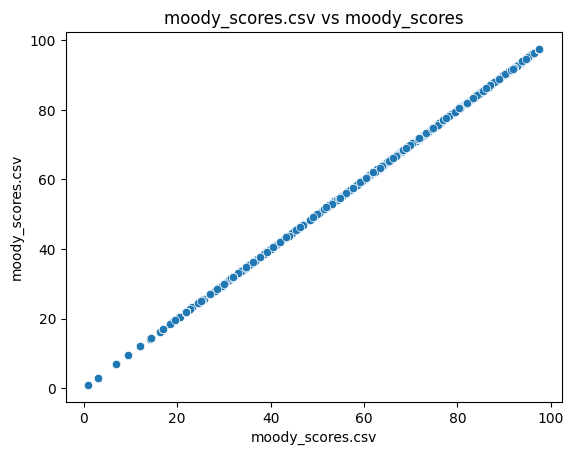

In [70]:
 #***************Linearity befor transformation *************
for feature in df.columns:  # Iterate through columns in X
    sns.scatterplot(x=df[feature], y=df['moody_scores.csv'])
    plt.title(f'{feature} vs moody_scores')
    plt.show()


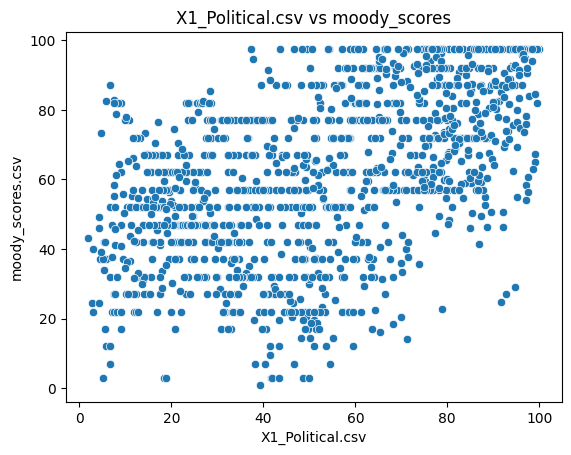

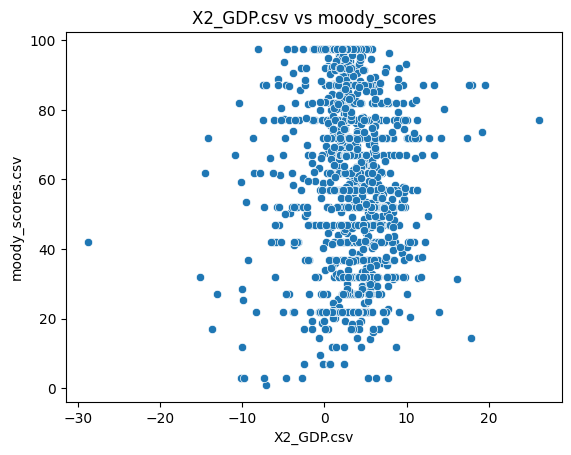

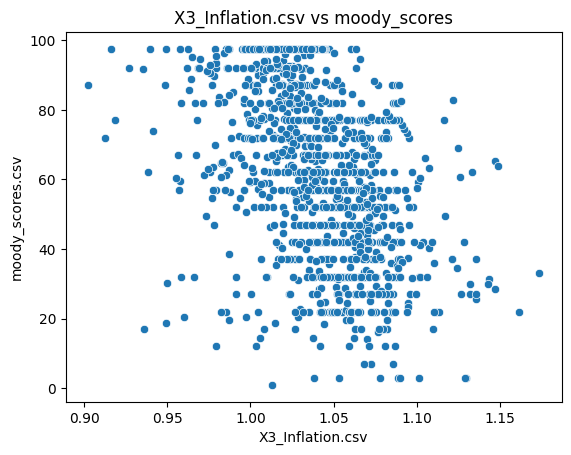

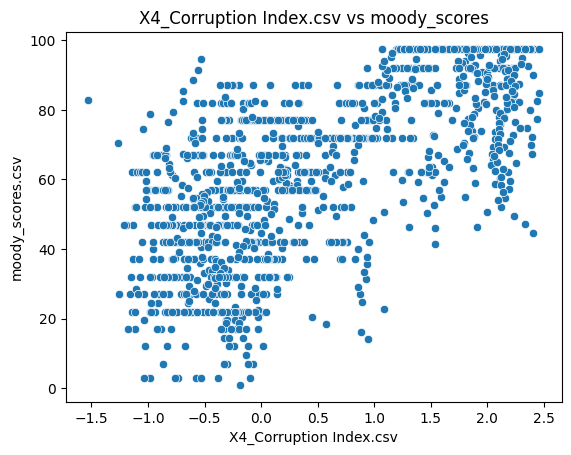

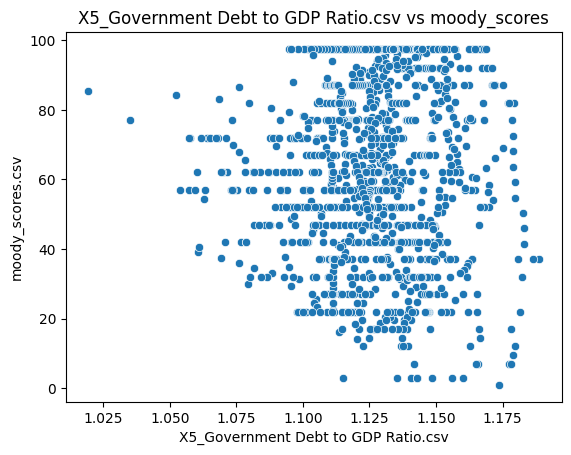

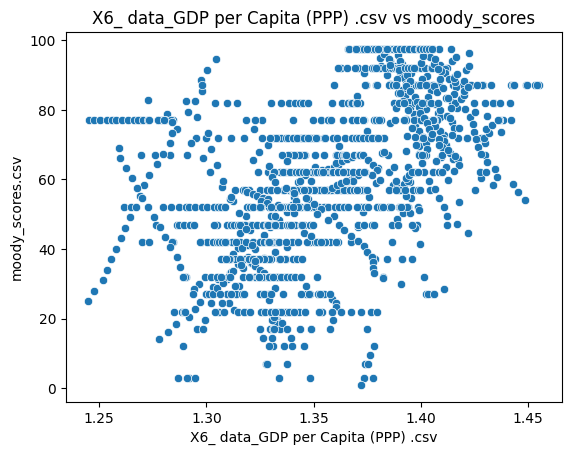

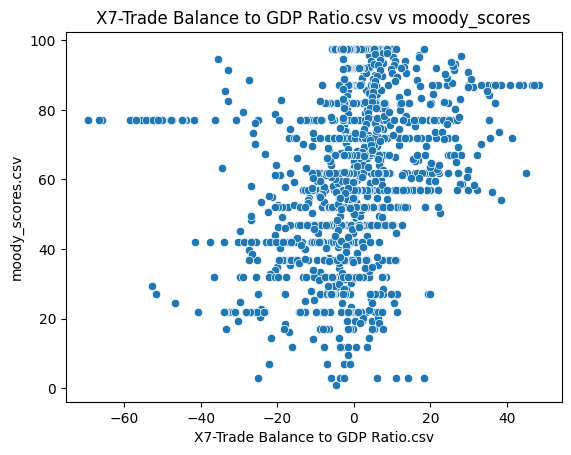

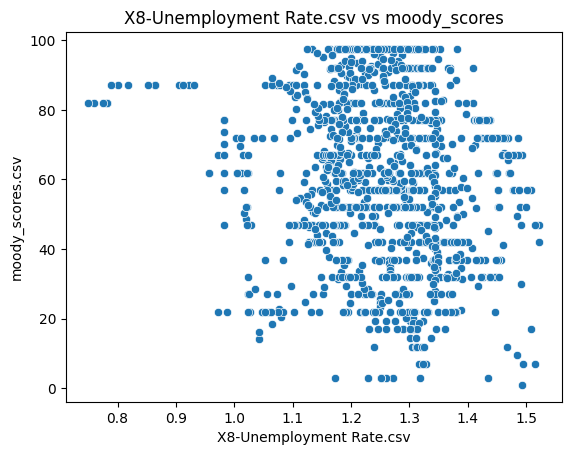

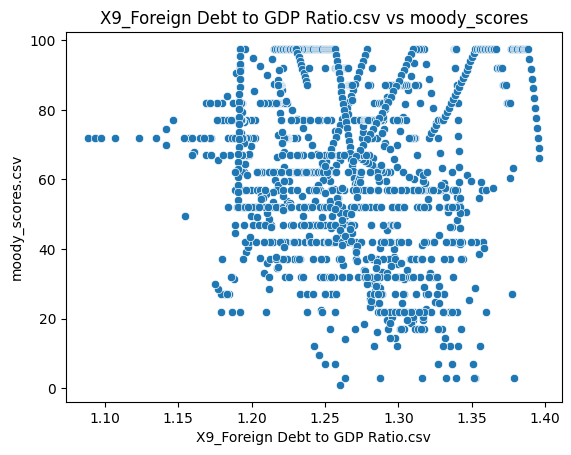

In [71]:
 #***************Linearity after transformation *************

# Scatterplot for each feature vs target
for feature in X.columns:  # Iterate through columns in X
    sns.scatterplot(x=X[feature], y=df['moody_scores.csv'])
    plt.title(f'{feature} vs moody_scores')
    plt.show()

In [19]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
sfs = SFS(LinearRegression(),
          k_features='best',
          forward=True,
          scoring='r2',
          cv=5)

# Perform feature selection
sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features = X.columns[list(sfs.k_feature_idx_)]
print('Selected features:', selected_features)

Selected features: Index(['X3_Inflation.csv', 'X4_Corruption Index.csv',
       'X5_Government Debt to GDP Ratio.csv',
       'X6_ data_GDP per Capita (PPP) .csv',
       'X9_Foreign Debt to GDP Ratio.csv'],
      dtype='object')


# Train the Model on the Selected Features:

In [26]:
# Subset the training data to include only selected features
X_train_selected = X_train[:, sfs.k_feature_idx_]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [27]:
# Subset the testing data to include only selected features
X_test_selected = X_test[:, sfs.k_feature_idx_]

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R-squared: 0.46614997061981456
MSE: 290.2761221203314


**Check for Multicollinearity Using VIF**

In [31]:
# Add a constant to the selected features
X_selected = sm.add_constant(X_train_selected)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature, excluding the constant
vif = pd.DataFrame()
vif["Variable"] = X.columns[list(sfs.k_feature_idx_)]
# Start the range from 1 to exclude the constant column (index 0)
vif["VIF"] = [variance_inflation_factor(X_selected, i) for i in range(1, X_selected.shape[1])]
print(vif)

                              Variable       VIF
0                     X3_Inflation.csv  1.103002
1              X4_Corruption Index.csv  1.568135
2  X5_Government Debt to GDP Ratio.csv  1.125455
3   X6_ data_GDP per Capita (PPP) .csv  1.453826
4     X9_Foreign Debt to GDP Ratio.csv  1.100405


# **Calculate skewness for all columns**

In [39]:
sfs_backward = SFS(LinearRegression(),
                   k_features='best',
                   forward=False,
                   scoring='r2',
                   cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)
selected_features_backward = X.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features (Backward Elimination):', selected_features_backward)

Selected features (Backward Elimination): Index(['X3_Inflation.csv', 'X4_Corruption Index.csv',
       'X5_Government Debt to GDP Ratio.csv',
       'X6_ data_GDP per Capita (PPP) .csv',
       'X9_Foreign Debt to GDP Ratio.csv'],
      dtype='object')


Skewness of features and target:
X1_Political.csv                      -0.019085
X2_GDP.csv                            -0.714635
X3_Inflation.csv                       7.316092
X4_Corruption Index.csv                0.450821
X5_Government Debt to GDP Ratio.csv    1.804550
X6_ data_GDP per Capita (PPP) .csv     1.707025
X7-Trade Balance to GDP Ratio.csv     -0.528948
X8-Unemployment Rate.csv               1.440235
X9_Foreign Debt to GDP Ratio.csv       1.637251
moody_scores.csv                      -0.200712
dtype: float64


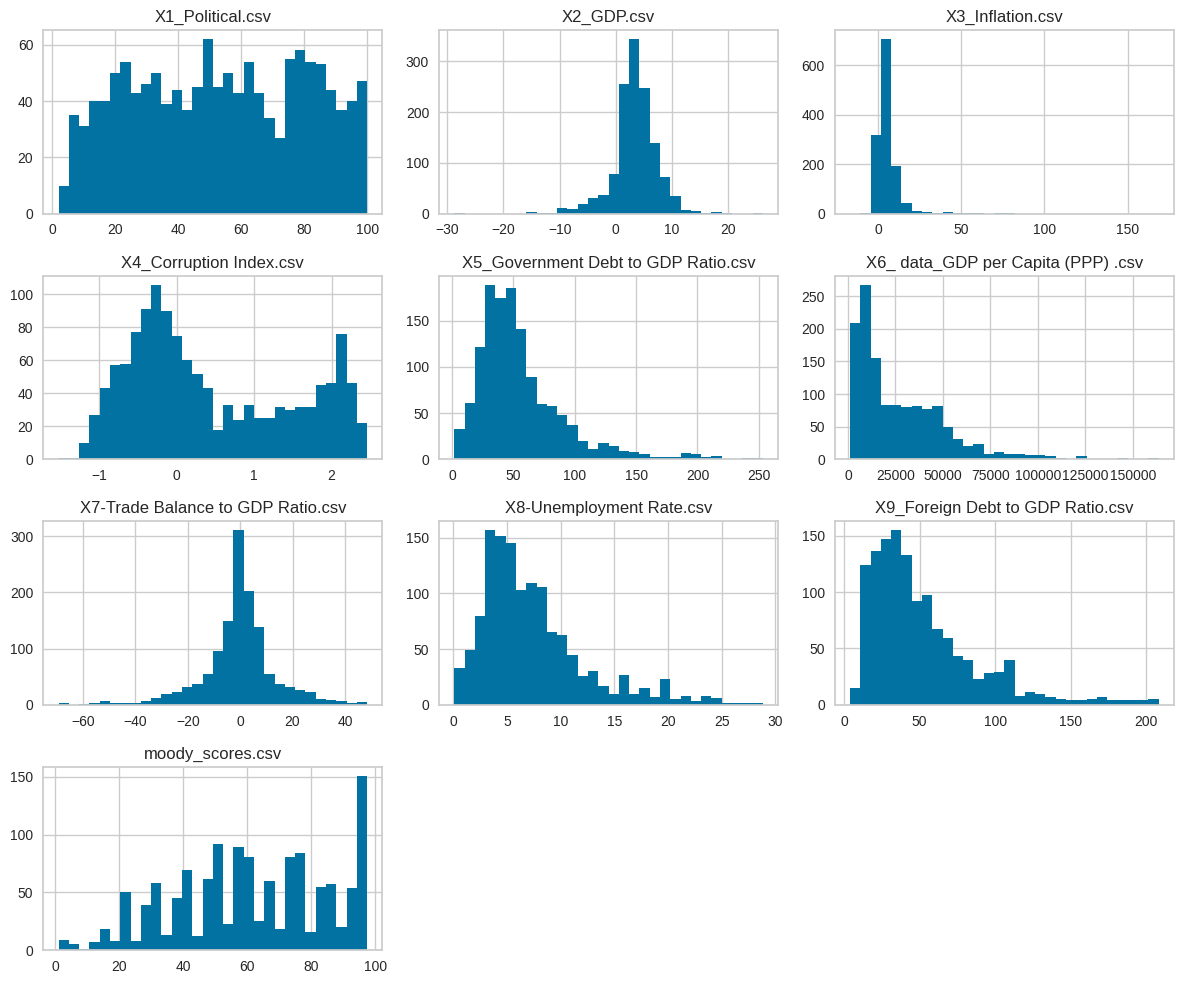

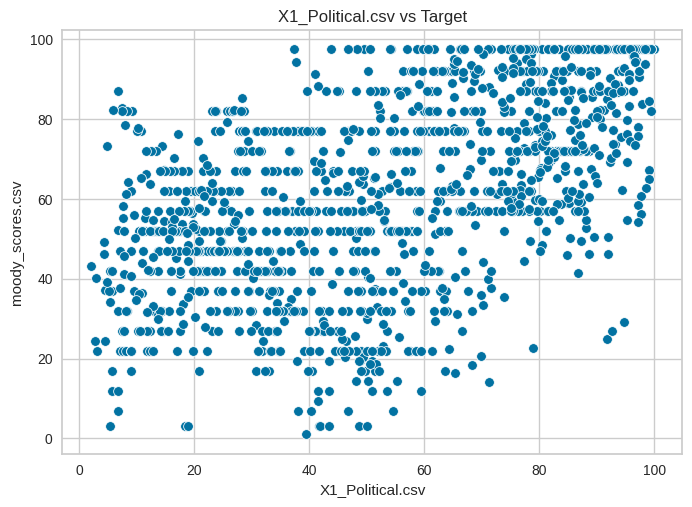

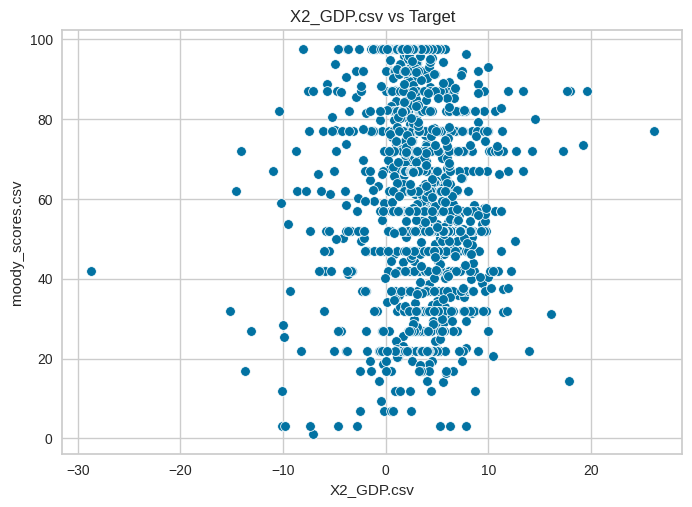

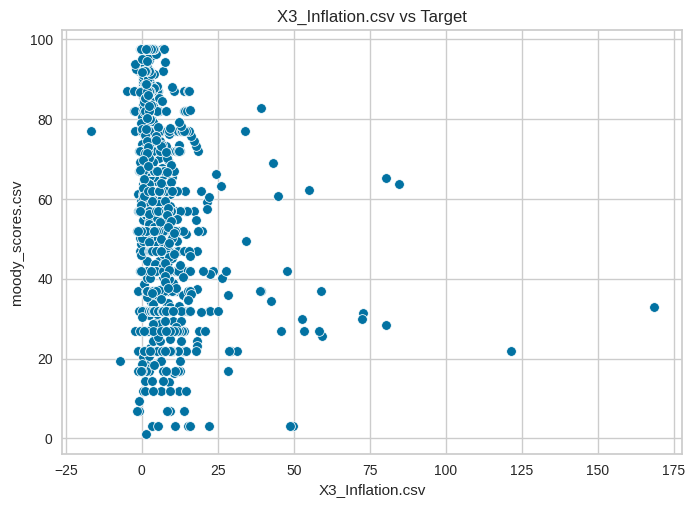

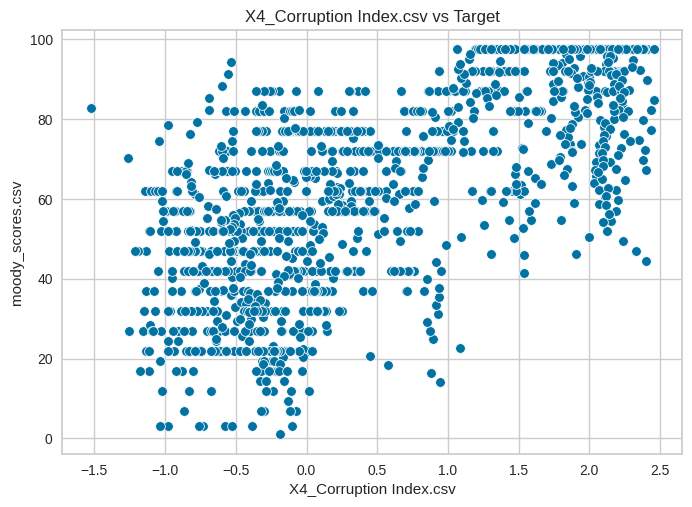

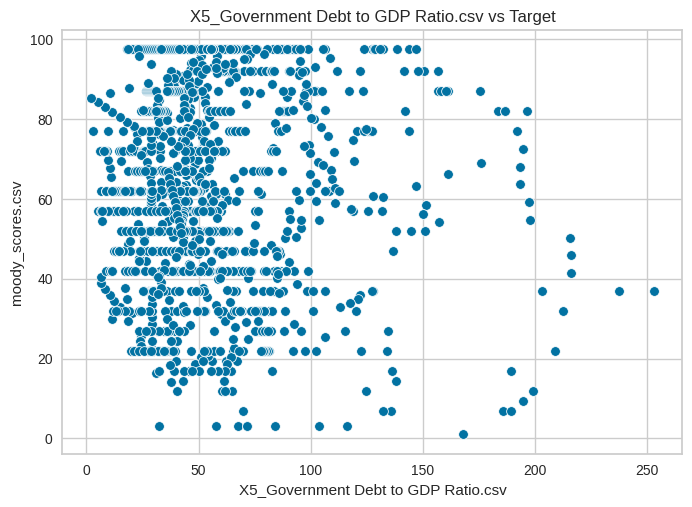

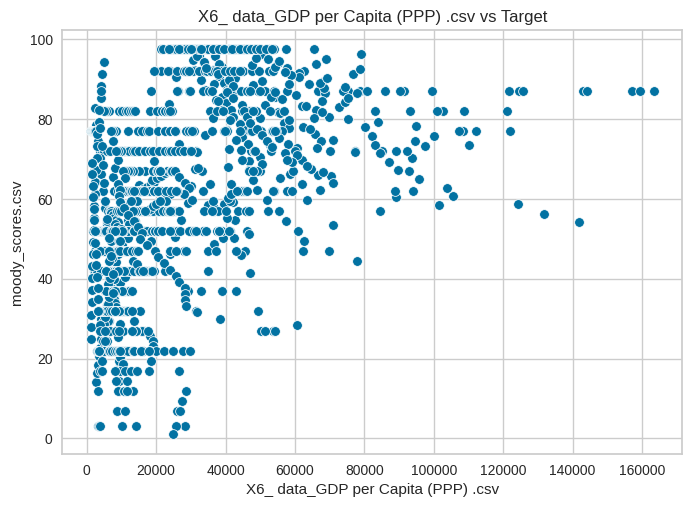

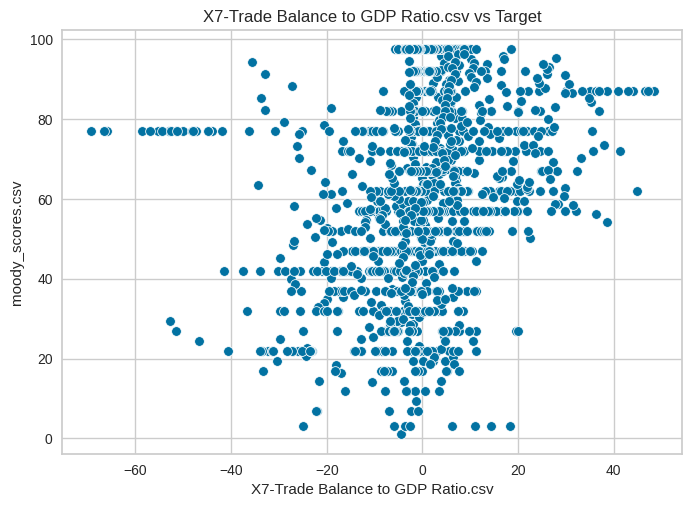

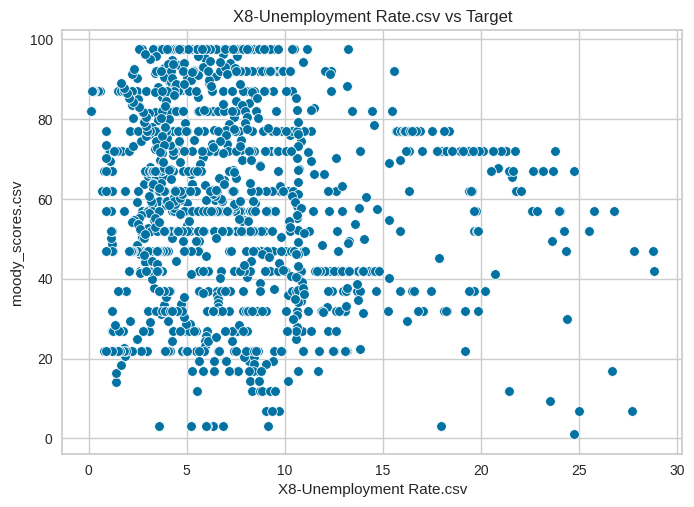

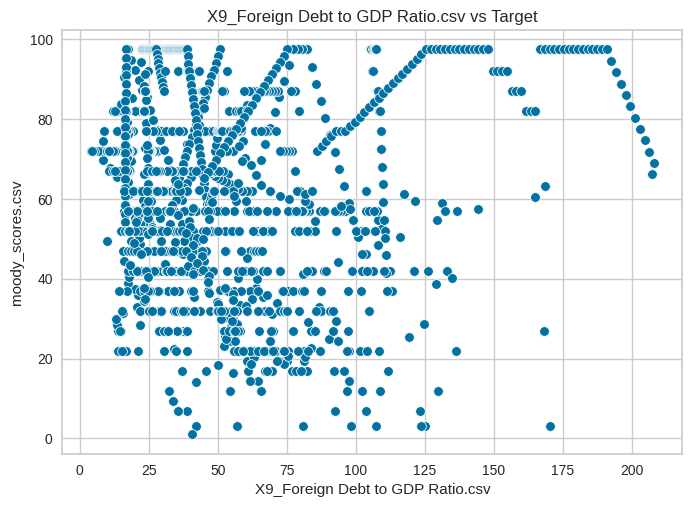

Variance Inflation Factor (VIF):
                              Variable        VIF
0                                const  20.285858
1                     X1_Political.csv   3.048937
2                           X2_GDP.csv   1.067001
3                     X3_Inflation.csv   1.129204
4              X4_Corruption Index.csv   3.508008
5  X5_Government Debt to GDP Ratio.csv   1.228351
6   X6_ data_GDP per Capita (PPP) .csv   2.476198
7    X7-Trade Balance to GDP Ratio.csv   1.764226
8             X8-Unemployment Rate.csv   1.332276
9     X9_Foreign Debt to GDP Ratio.csv   1.190382
Durbin-Watson Statistic: 0.1354200132327059


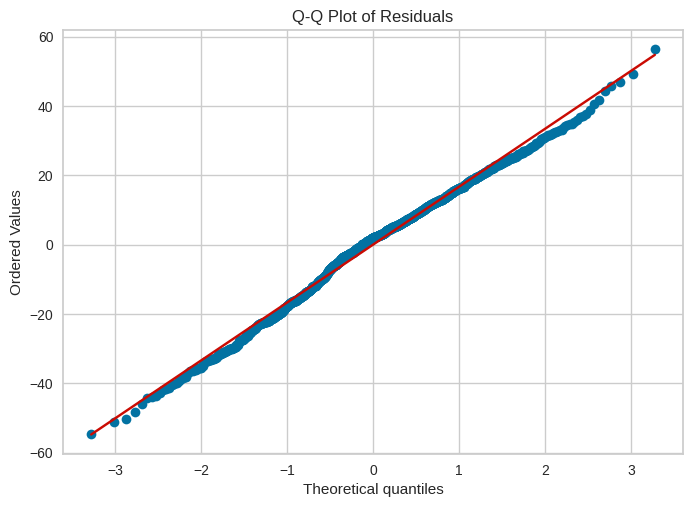

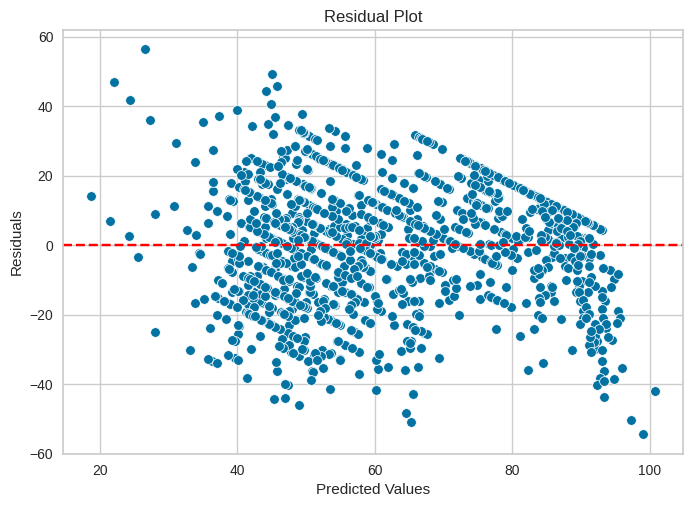

Skewness after transformation:
X1_Political.csv                      -0.019085
X2_GDP.csv                            -0.714635
X3_Inflation.csv                       2.451752
X4_Corruption Index.csv                0.450821
X5_Government Debt to GDP Ratio.csv    0.744115
X6_ data_GDP per Capita (PPP) .csv     0.629484
X7-Trade Balance to GDP Ratio.csv     -0.528948
X8-Unemployment Rate.csv               0.489595
X9_Foreign Debt to GDP Ratio.csv       0.828901
dtype: float64
Linear Regression Performance:
R-squared: 0.47
RMSE: 16.97
Random Forest Regression Performance:
R-squared: 0.89
RMSE: 7.68
Nonlinear Regression (Random Forest) is the better choice.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import probplot
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('/content/sample_data/output (2).csv')

# Drop unnecessary columns (Country and Year)
df = df.drop(columns=['Country', 'Year'])


# Step 1: Check Skewness of Features and Target
print("Skewness of features and target:")
print(df.skew())

# Visualize skewness using histograms
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Step 2: Check Linearity (Scatterplots of Features vs Target)
for feature in df.columns[:-1]:  # Exclude the target variable
    sns.scatterplot(x=df[feature], y=df['moody_scores.csv'])
    plt.title(f'{feature} vs Target')
    plt.show()

# Step 3: Check Multicollinearity (VIF)
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Add a constant for VIF calculation
X = df.drop('moody_scores.csv', axis=1)
X = sm.add_constant(X)

# Calculate VIF
vif = calculate_vif(X)
print("Variance Inflation Factor (VIF):")
print(vif)

# Step 4: Check Independence (Durbin-Watson Test)
# Fit a linear regression model
X = df.drop('moody_scores.csv', axis=1)
y = df['moody_scores.csv']
model = sm.OLS(y, sm.add_constant(X)).fit()

# Perform Durbin-Watson test
dw = durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {dw}')

# Step 5: Check Normality of Residuals (Q-Q Plot)
residuals = model.resid
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 6: Check Homoscedasticity (Residual Plot)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 7: Handle Skewness (If Necessary)
# Apply Box-Cox transformation to highly skewed features
X['X3_Inflation.csv'] = np.sqrt(X['X3_Inflation.csv'])
X['X6_ data_GDP per Capita (PPP) .csv'] = np.sqrt(X['X6_ data_GDP per Capita (PPP) .csv'])
X['X5_Government Debt to GDP Ratio.csv'] = np.sqrt(X['X5_Government Debt to GDP Ratio.csv'])
X['X9_Foreign Debt to GDP Ratio.csv'] = np.sqrt(X['X9_Foreign Debt to GDP Ratio.csv'])
X['X8-Unemployment Rate.csv'] = np.sqrt(X['X8-Unemployment Rate.csv'])
skewness_after = X.skew()


# Recheck skewness after transformation
print("Skewness after transformation:")
print(X.skew())

# Step 8: Split Data into Training and Testing Sets
X = df.drop('moody_scores.csv', axis=1)
y = df['moody_scores.csv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression
print("Linear Regression Performance:")
print(f'R-squared: {r2_score(y_test, y_pred_linear):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear)):.2f}')

# Step 10: Evaluate Nonlinear Regression (Random Forest)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate random forest regression
print("Random Forest Regression Performance:")
print(f'R-squared: {r2_score(y_test, y_pred_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')

# Step 11: Compare Models and Choose the Best One
if r2_score(y_test, y_pred_linear) > r2_score(y_test, y_pred_rf):
    print("Linear Regression is the better choice.")
else:
    print("Nonlinear Regression (Random Forest) is the better choice.")

**Stepwise Forward Selection**

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize the SequentialFeatureSelector for forward selection
sfs = SFS(LinearRegression(),
          k_features='best',  # Select the best subset of features
          forward=True,       # Use forward selection
          scoring='r2',       # Use R-squared as the scoring metric
          cv=5)               # Use 5-fold cross-validation

# Perform feature selection
sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features = X.columns[list(sfs.k_feature_idx_)]
print("Selected features:", selected_features)

# Subset the training and testing data to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 6: Evaluate Linear Regression with Selected Features
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)
y_pred_linear = linear_model.predict(X_test_selected)

# Evaluate linear regression
print("Linear Regression Performance (Selected Features):")
print(f'R-squared: {r2_score(y_test, y_pred_linear):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear)):.2f}')

# Step 7: Evaluate Nonlinear Regression (Random Forest) with Selected Features
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Evaluate random forest regression
print("Random Forest Regression Performance (Selected Features):")
print(f'R-squared: {r2_score(y_test, y_pred_rf):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}')

# Step 8: Compare Models and Choose the Best One
if r2_score(y_test, y_pred_linear) > r2_score(y_test, y_pred_rf):
    print("Linear Regression is the better choice.")
else:
    print("Nonlinear Regression (Random Forest) is the better choice.")

Selected features: Index(['X3_Inflation.csv', 'X4_Corruption Index.csv',
       'X5_Government Debt to GDP Ratio.csv',
       'X6_ data_GDP per Capita (PPP) .csv',
       'X9_Foreign Debt to GDP Ratio.csv'],
      dtype='object')
Linear Regression Performance (Selected Features):
R-squared: 0.47
RMSE: 17.04
Random Forest Regression Performance (Selected Features):
R-squared: 0.87
RMSE: 8.55
Nonlinear Regression (Random Forest) is the better choice.


In [14]:
# Step 6: Evaluate Decision Tree with Selected Features
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42) # Initialize the DecisionTreeRegressor
tree_model.fit(X_train_selected, y_train)
y_pred_tree = tree_model.predict(X_test_selected)

# Evaluate decision tree regression
print("Decision Tree Regression Performance (Selected Features):")
print(f'R-squared: {r2_score(y_test, y_pred_tree):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}')
# Step 8: Compare Models and Choose the Best One
if r2_score(y_test, y_pred_tree) > r2_score(y_test, y_pred_rf):
    print("Decision Tree Regression is the better choice.")
else:
    print("Random Forest Regression is the better choice.")

Decision Tree Regression Performance (Selected Features):
R-squared: 0.69
RMSE: 13.07
Random Forest Regression is the better choice.


# **pycaret model **

In [16]:
pip install pycaret

In [19]:
# Initialize the PyCaret regression experiment
# Initialize the PyCaret regression experiment
from pycaret.regression import setup, compare_models  # import setup and compare_models

reg_experiment = setup(data=df.drop('moody_scores.csv', axis=1),
target= df['moody_scores.csv'],  # Target variable
                       session_id=42)  # Random seed for reproducibility

,Description,Value
0,Session id,42
1,Target,moody_scores.csv
2,Target type,Regression
3,Original data shape,"(1310, 10)"
4,Transformed data shape,"(1310, 10)"
5,Transformed train set shape,"(916, 10)"
6,Transformed test set shape,"(394, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [20]:
# Perform feature selection using PyCaret
selected_features = compare_models(include=['lr'], sort='R2', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,13.6133,291.4438,17.0348,0.5029,0.4160,0.4437,0.8190


Processing:   0%|          | 0/9 [00:00<?, ?it/s]

In [21]:
# Compare multiple regression models
best_model = compare_models(sort='R2')  # Sort by R-squared

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.1483,56.8465,7.4771,0.9032,0.2309,0.1876,0.2880
rf,Random Forest Regressor,6.2410,81.3994,8.9573,0.8614,0.2597,0.2161,0.9810
xgboost,Extreme Gradient Boosting,6.5144,89.6731,9.3714,0.8468,0.2660,0.2194,0.4400
lightgbm,Light Gradient Boosting Machine,6.6231,90.8540,9.4530,0.8447,0.2695,0.2338,0.4770
gbr,Gradient Boosting Regressor,8.3029,119.4326,10.8622,0.7966,0.2954,0.2820,0.3050
dt,Decision Tree Regressor,7.4381,164.0323,12.6653,0.7217,0.3386,0.2295,0.0330
ada,AdaBoost Regressor,12.3858,209.6992,14.4553,0.6423,0.3621,0.3830,0.1570
lr,Linear Regression,13.6133,291.4438,17.0348,0.5029,0.4160,0.4437,0.0590
ridge,Ridge Regression,13.6153,291.4342,17.0344,0.5029,0.4161,0.4439,0.0580
br,Bayesian Ridge,13.6379,291.5124,17.0358,0.5028,0.4170,0.4457,0.0290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [30]:
from pycaret.regression import create_model #Added create_model for creating the models et,rf,xgboost
create_ensemble_model = lambda model, method=None: model


In [32]:
et=create_model('et',fold=5)
rf=create_model('rf',fold=5)
xgboost=create_model('xgboost',fold=5)
dt = create_model('dt', fold=10)  # Create Decision Tree model

dt = dt(estimator_list=[et, rf, xgboost], fold=10, method='boosting')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.2512,61.5101,7.8428,0.8981,0.2192,0.1594
1,5.8208,72.6086,8.5211,0.8769,0.2557,0.1923
2,5.6565,75.2294,8.6735,0.8779,0.3036,0.2429
3,4.8545,45.0382,6.7110,0.9210,0.2748,0.2884
4,5.6571,61.9312,7.8696,0.8883,0.1780,0.1253
Mean,5.4480,63.2635,7.9236,0.8924,0.2463,0.2017
Std,0.3513,10.6539,0.6927,0.0163,0.0438,0.0582


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.2323,83.9414,9.1620,0.8610,0.2556,0.1921
1,7.0496,92.8038,9.6335,0.8427,0.2800,0.2306
2,6.6310,95.5053,9.7727,0.8449,0.3170,0.2683
3,6.0273,71.1436,8.4347,0.8753,0.2669,0.2329
4,6.7327,90.5367,9.5151,0.8367,0.2261,0.1626
Mean,6.5346,86.7861,9.3036,0.8521,0.2691,0.2173
Std,0.3640,8.7073,0.4793,0.0141,0.0298,0.0365


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.6192,84.8418,9.2110,0.8595,0.2300,0.1705
1,7.2740,107.0109,10.3446,0.8186,0.2989,0.2390
2,7.4231,114.0348,10.6787,0.8149,0.3302,0.2702
3,5.6456,62.8453,7.9275,0.8898,0.2772,0.2796
4,6.7843,89.6813,9.4700,0.8382,0.2107,0.1463
Mean,6.7492,91.6828,9.5264,0.8442,0.2694,0.2211
Std,0.6270,17.9832,0.9650,0.0278,0.0439,0.0535


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0694,89.2910,9.4494,0.8541,0.3480,0.1680
1,9.0031,186.5783,13.6594,0.6867,0.3386,0.2121
2,8.1648,196.4386,14.0157,0.6953,0.4159,0.2761
3,6.7330,130.3616,11.4176,0.7481,0.2995,0.1407
4,7.3034,141.5420,11.8971,0.7475,0.2872,0.1918
5,8.2605,268.8925,16.3979,0.5996,0.4939,0.5141
6,6.9495,145.5110,12.0628,0.7608,0.2726,0.2190
7,5.5082,109.9664,10.4865,0.7934,0.2886,0.2064
8,8.4307,184.0772,13.5675,0.6792,0.3430,0.2019


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

TypeError: 'DecisionTreeRegressor' object is not callable